In [38]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
%matplotlib inline
from openpyxl import load_workbook

In [39]:
ECG = pd.read_csv('DJ_ECG.txt',names=['ECG'])
ECG

,ECG
0,903
1,1655
2,1680
3,1692
4,1698
...,...
30875,1718
30876,1742
30877,1765
30878,1773


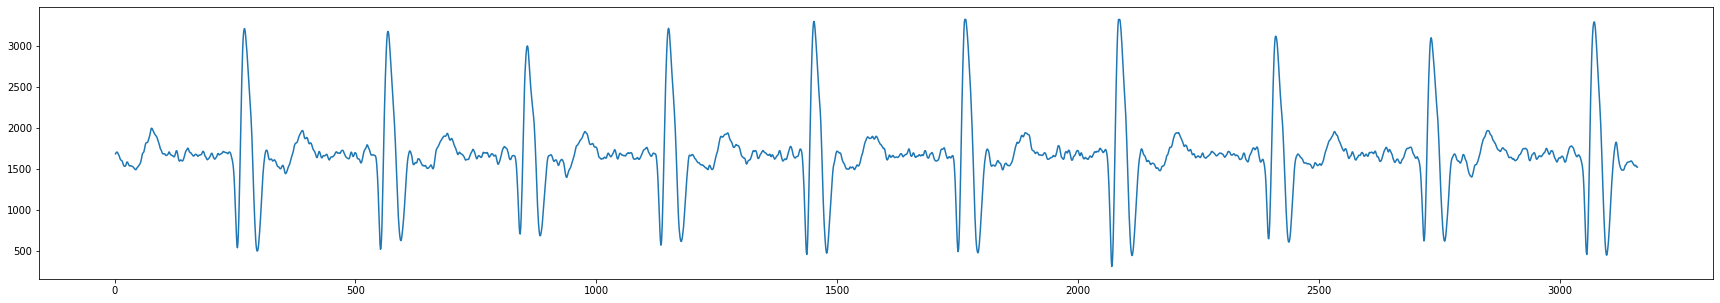

In [40]:
plt.figure(figsize=(30,5))
plt.plot(ECG[2:3162])
plt.show()

In [41]:
PPG = pd.read_csv('DJ_PPG.txt',names=['q','G','a','PPG'])
PPG

,q,G,a,PPG
0,1661,1656,1658,0
1,1656,1656,1658,117784
2,1655,1655,1658,183516
3,1656,1655,1658,249088
4,1656,1655,1659,311962
...,...,...,...,...
31315,1658,1656,1658,361457
31316,1655,1657,1659,361610
31317,1654,1657,1659,361725
31318,1654,1657,1661,361929


In [42]:
PPG = PPG['PPG']
PPG =  pd.DataFrame(PPG[5:31620])
PPG

,PPG
5,355642
6,355243
7,354879
8,354477
9,354078
...,...
31315,361457
31316,361610
31317,361725
31318,361929


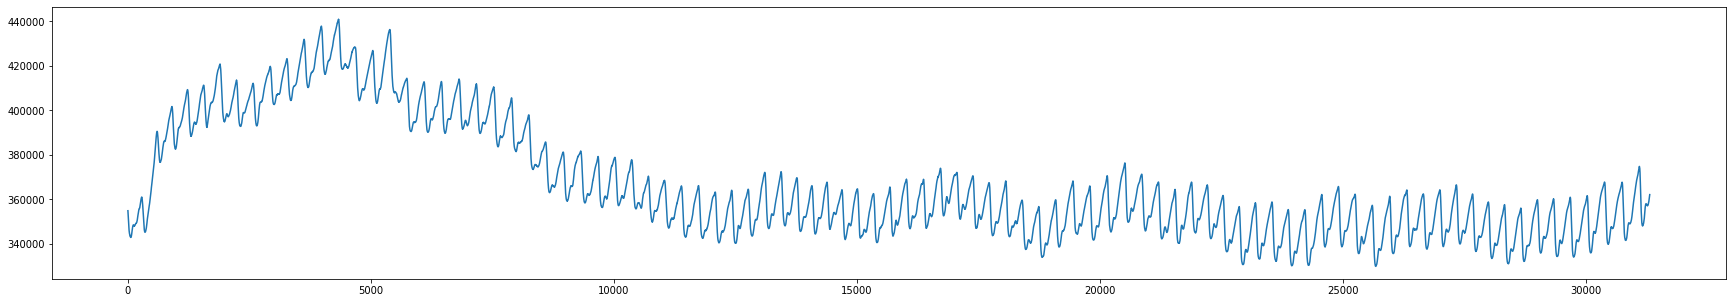

In [43]:
plt.figure(figsize=(30,5))
plt.plot(PPG[2:31620])
plt.show()

In [44]:
from scipy.signal import resample

# Assuming you have PPG and ECG signals as numpy arrays
# Replace these with your actual signals
ppg_signal = PPG.values
ecg_signal = ECG.values

# Define the original and target sampling rates
original_sampling_rate = 300  # Hz
target_sampling_rate = 125  # Hz

# Calculate the resampling factor
resampling_factor = original_sampling_rate / target_sampling_rate

# Calculate the number of samples in the resampled signal
num_samples_resampled = int(len(ppg_signal) / resampling_factor)

# Resample the PPG and ECG signals
resampled_ppg = resample(ppg_signal, num_samples_resampled)
resampled_ecg = resample(ecg_signal, num_samples_resampled)

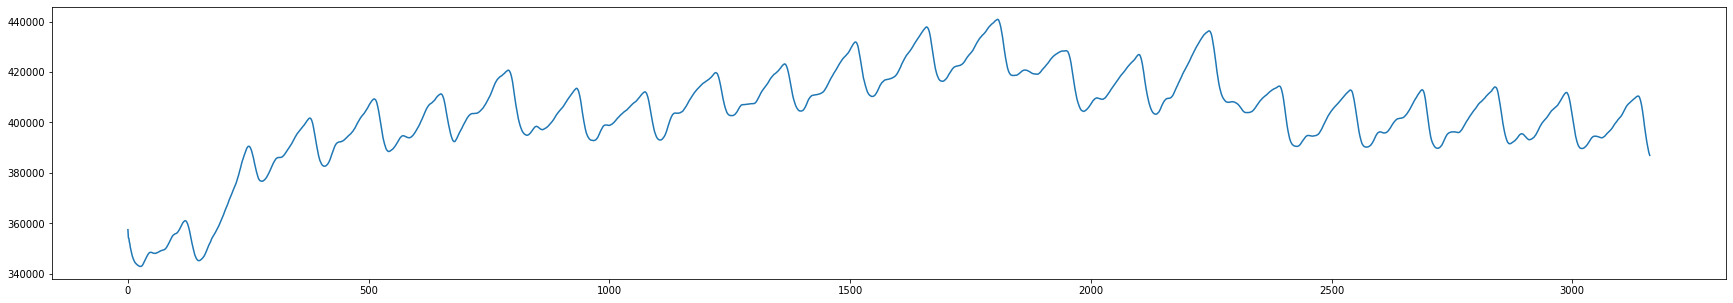

In [45]:
plt.figure(figsize=(30,5))
plt.plot(resampled_ppg[0:3162])
plt.show()

In [46]:
chunk_size = 250

# Calculate the number of chunks
num_chunks = len(resampled_ppg) // chunk_size

# Split the signals into chunks
ppg_chunks = np.split(resampled_ppg[:num_chunks * chunk_size], num_chunks)
ecg_chunks = np.split(resampled_ecg[:num_chunks * chunk_size], num_chunks)


In [47]:
ppg_chunks

[array([[357469.6493591 ],
        [354225.12931911],
        [354024.85478672],
        [352574.05646068],
        [351875.23166346],
        [350444.76102396],
        [349610.60138259],
        [348589.33070695],
        [347935.72047327],
        [347068.51576818],
        [346566.78598678],
        [345920.41106496],
        [345563.19726252],
        [345029.47768784],
        [344740.00436303],
        [344344.870626  ],
        [344201.8408902 ],
        [343923.74916067],
        [343825.52761724],
        [343585.49047885],
        [343470.66143024],
        [343273.45148779],
        [343211.37366377],
        [343038.27461707],
        [342947.68406283],
        [342907.2564518 ],
        [342929.61411737],
        [342887.02602422],
        [342987.60715329],
        [343095.27879323],
        [343335.57777424],
        [343588.06612223],
        [343970.21000476],
        [344256.31652755],
        [344704.95532295],
        [345075.27777076],
        [345588.29786009],
 

In [48]:
len(ecg_chunks)

52

In [49]:
ecg_chunks

[array([[1365.19771313],
        [1674.03244759],
        [1706.34513006],
        [1680.11126135],
        [1657.13505122],
        [1613.00153821],
        [1602.24399566],
        [1576.25491501],
        [1538.37027035],
        [1525.8496834 ],
        [1547.34268066],
        [1580.31858397],
        [1559.39501825],
        [1533.78849578],
        [1534.63222777],
        [1529.26367594],
        [1523.25236374],
        [1506.38505569],
        [1489.46854395],
        [1491.8596143 ],
        [1516.03001748],
        [1530.49114997],
        [1552.69793099],
        [1582.56084341],
        [1653.20450253],
        [1692.2215073 ],
        [1719.93970063],
        [1791.64655538],
        [1816.34606249],
        [1822.55476099],
        [1860.79984328],
        [1915.76553897],
        [1984.25473432],
        [1985.77475651],
        [1956.51332186],
        [1925.43241779],
        [1906.08131766],
        [1884.57484085],
        [1844.94671444],
        [1801.77619513],


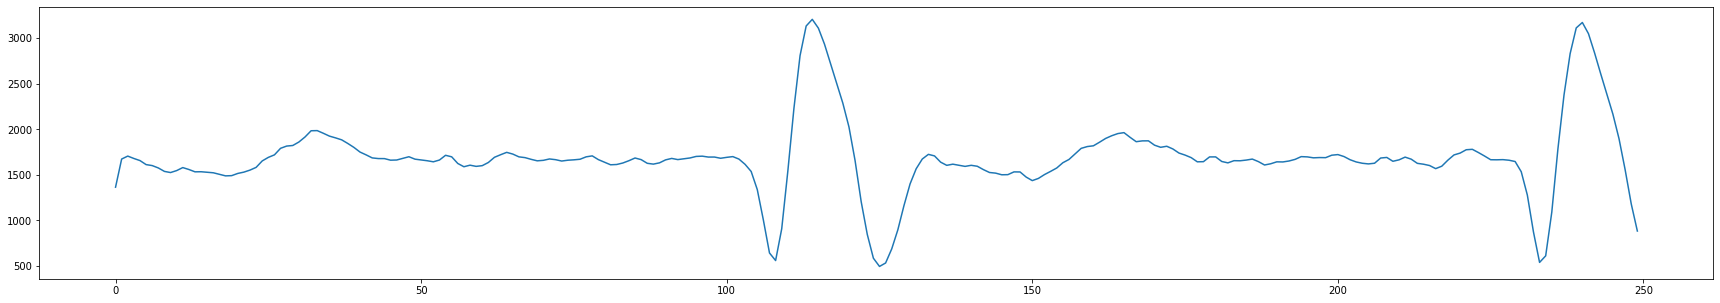

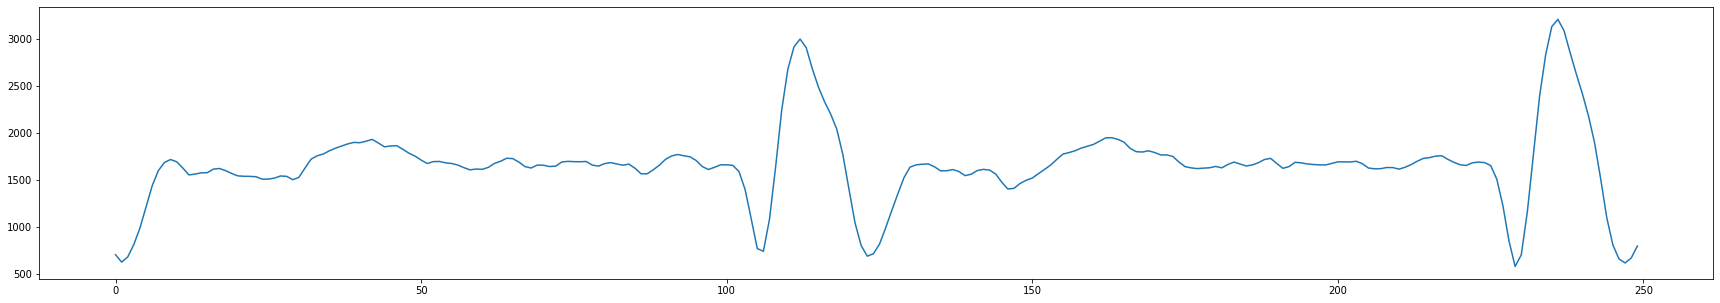

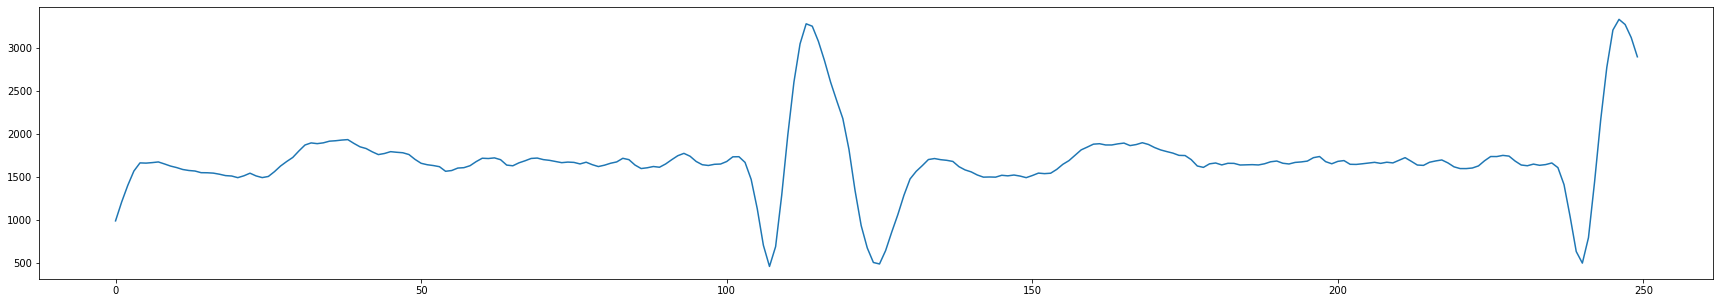

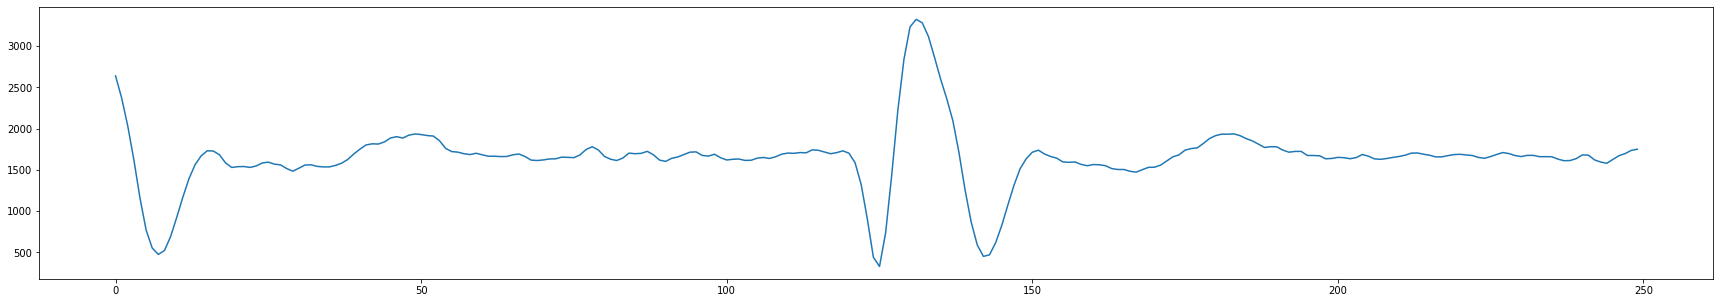

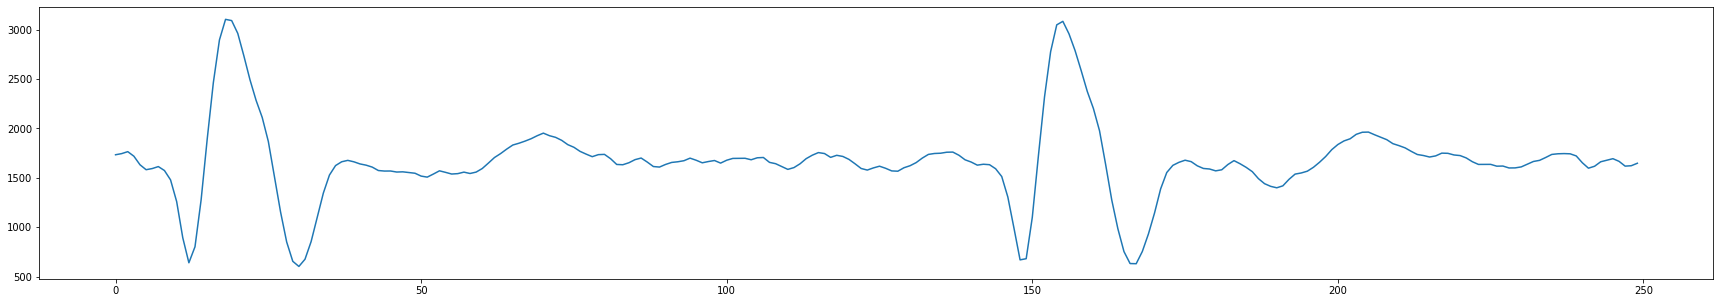

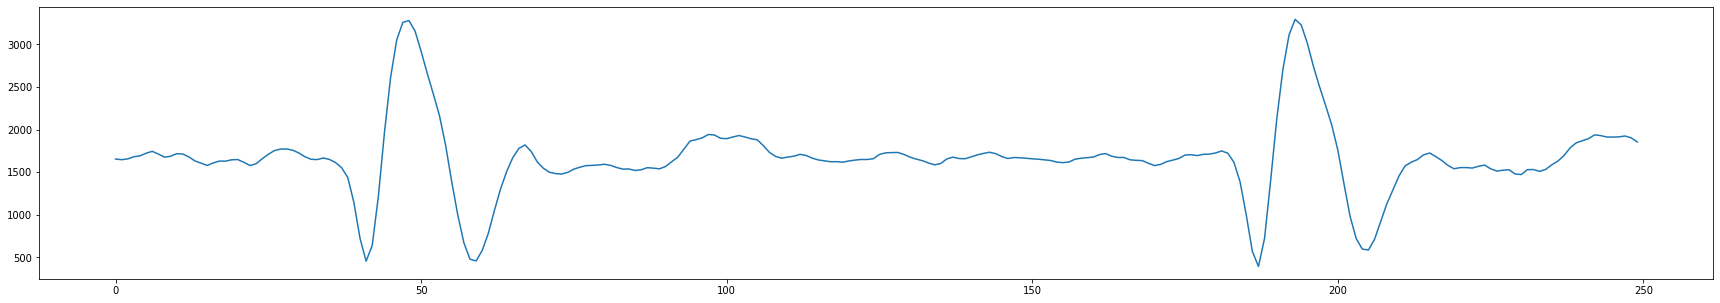

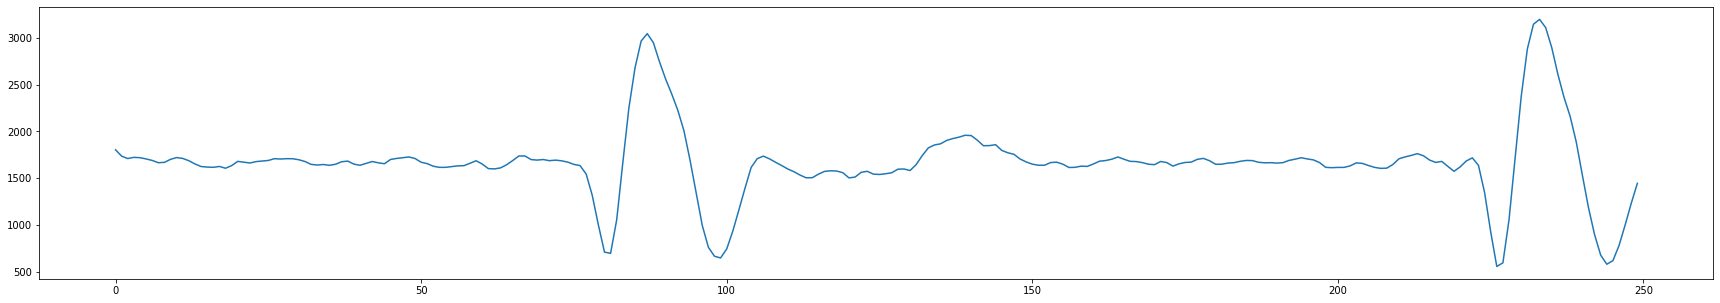

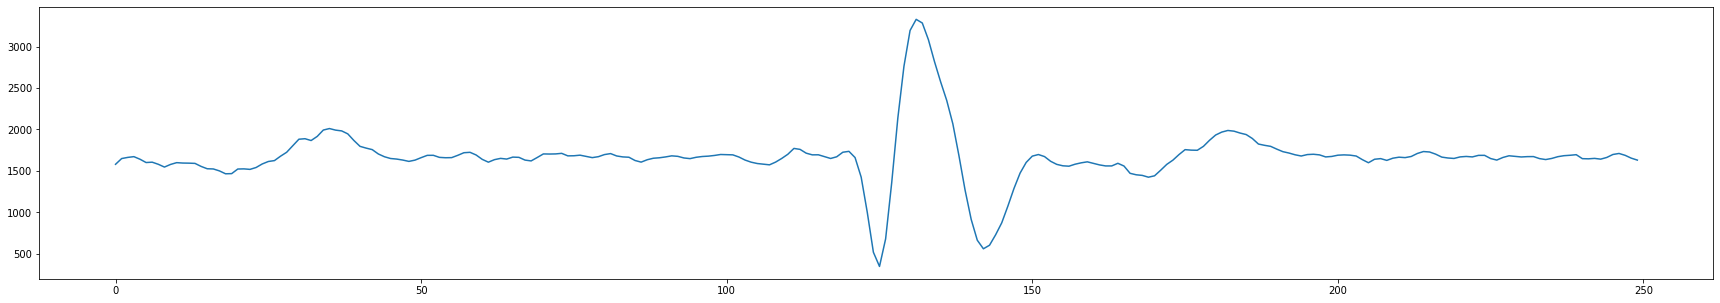

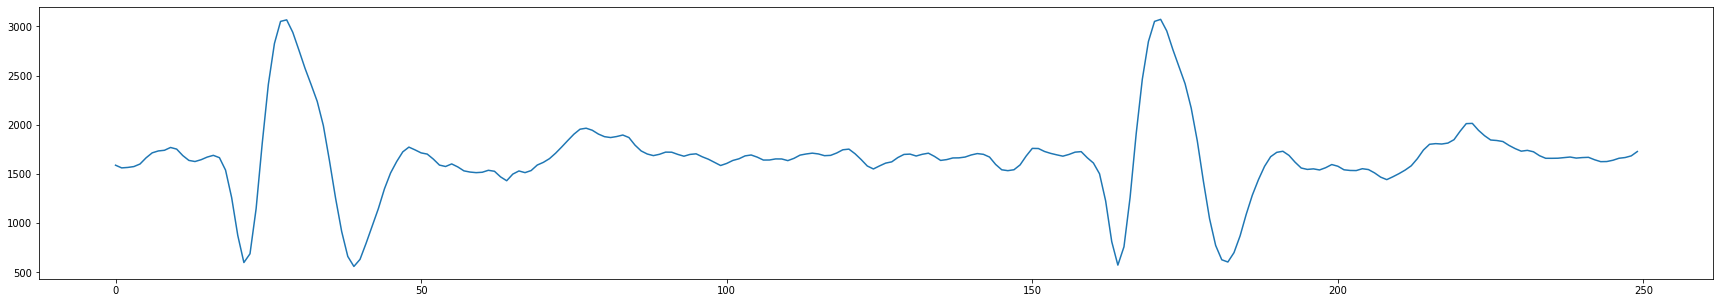

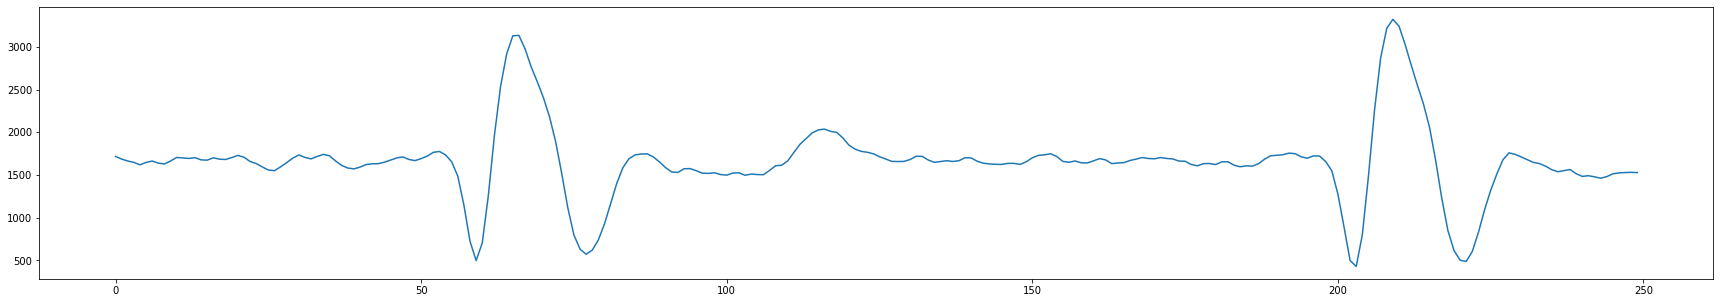

In [50]:
for i in range(0,10):
    plt.figure(figsize=(30,5))
    plt.plot(ecg_chunks[i])
    plt.show()

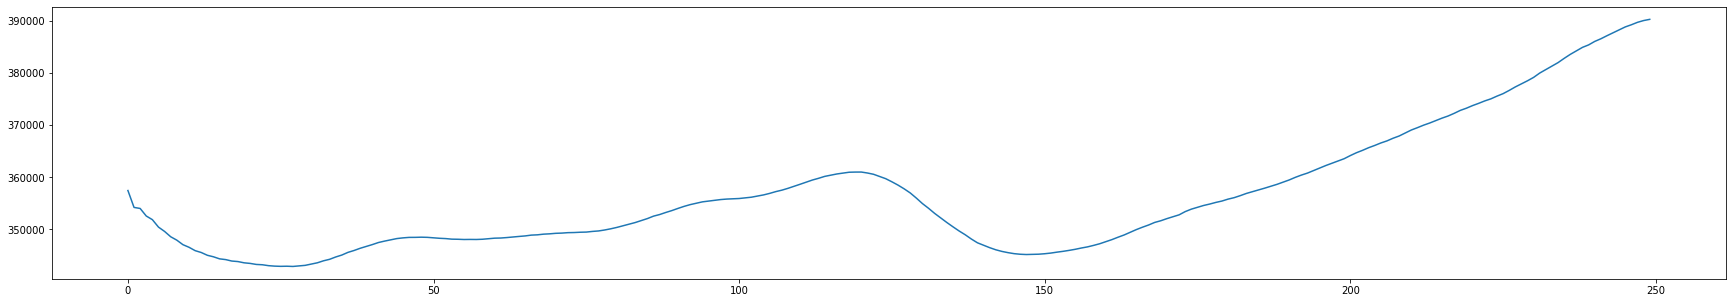

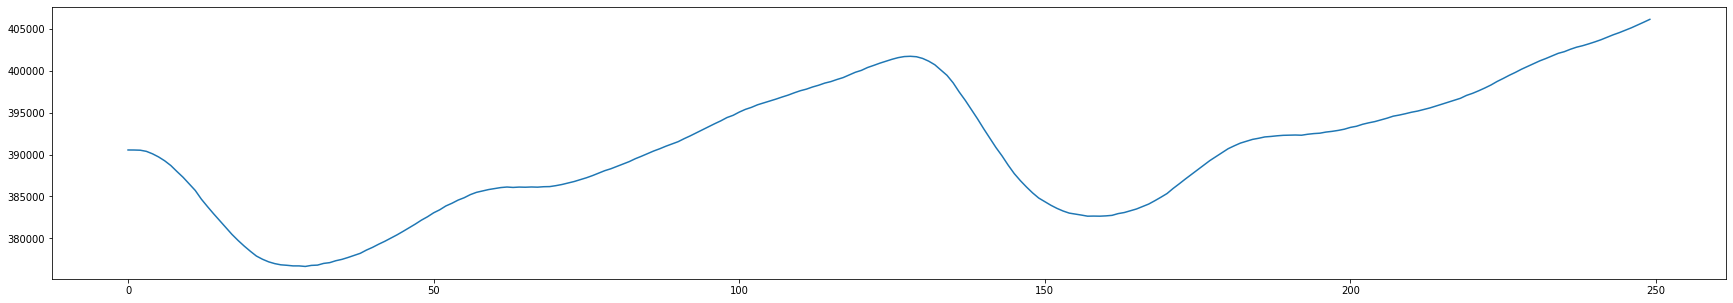

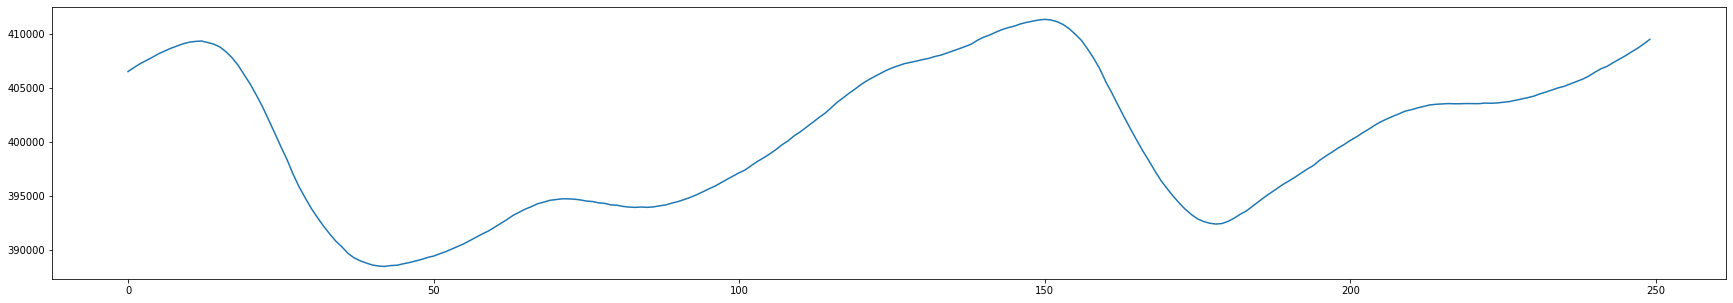

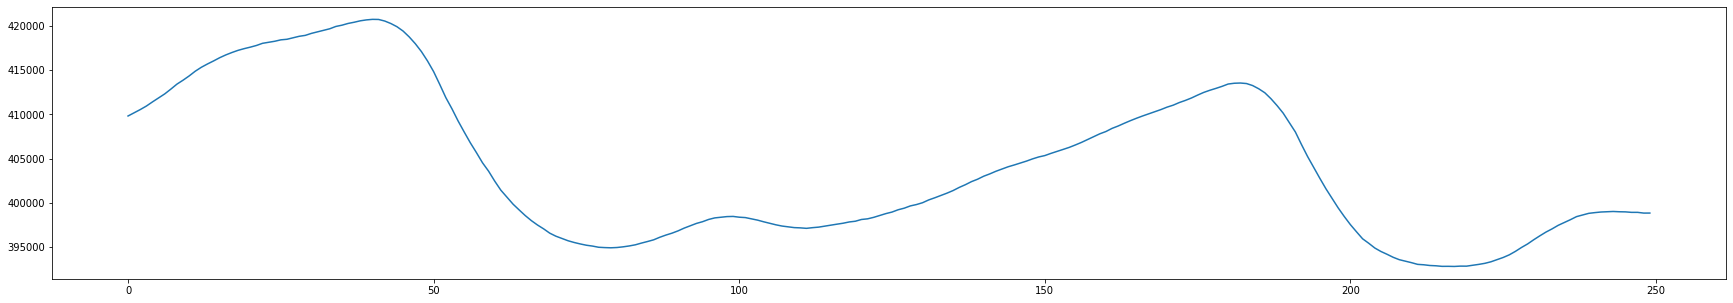

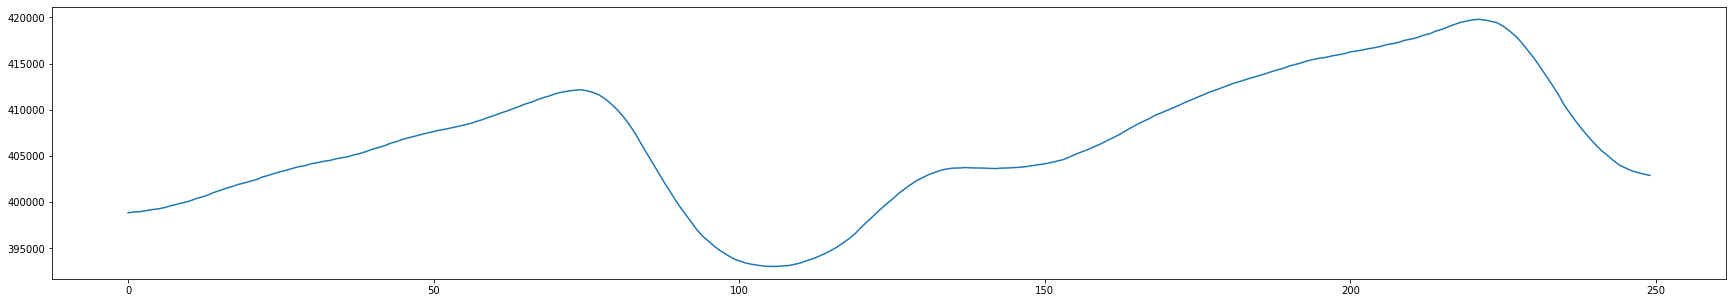

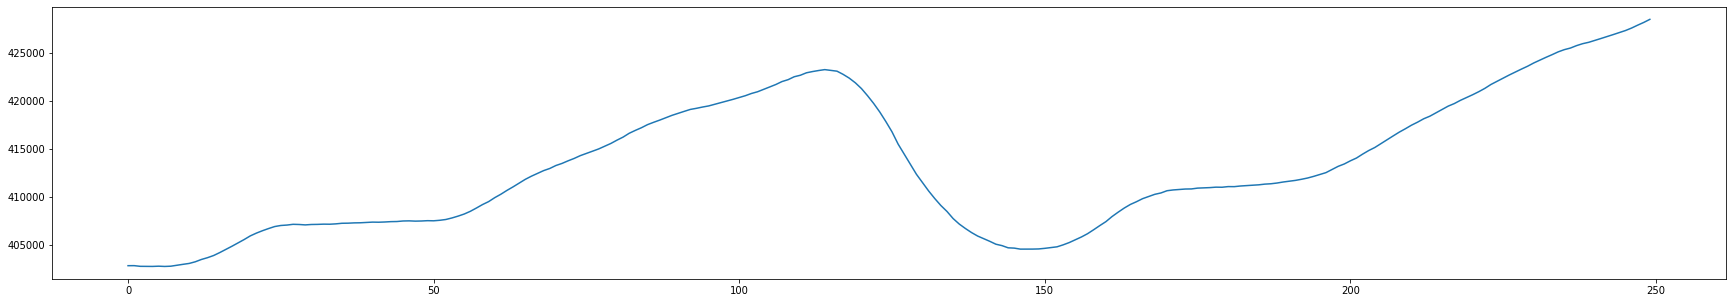

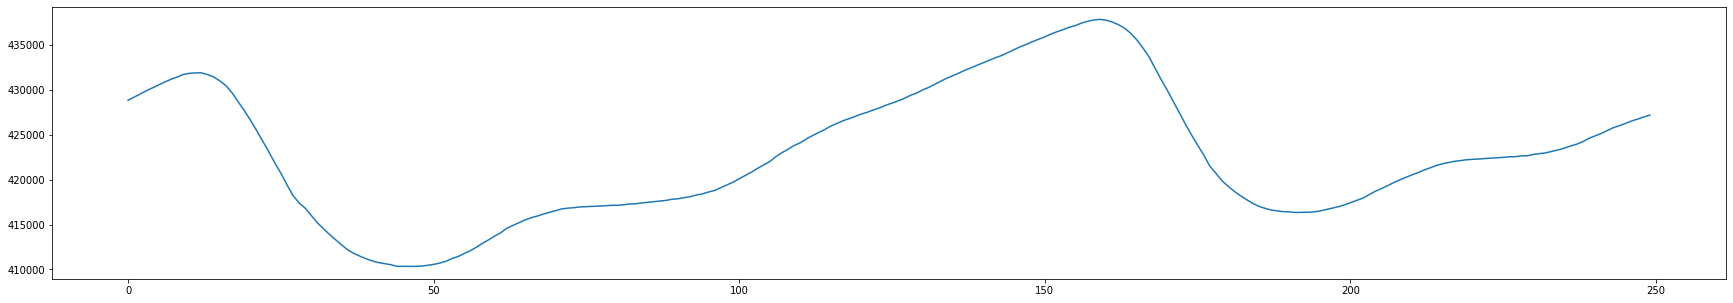

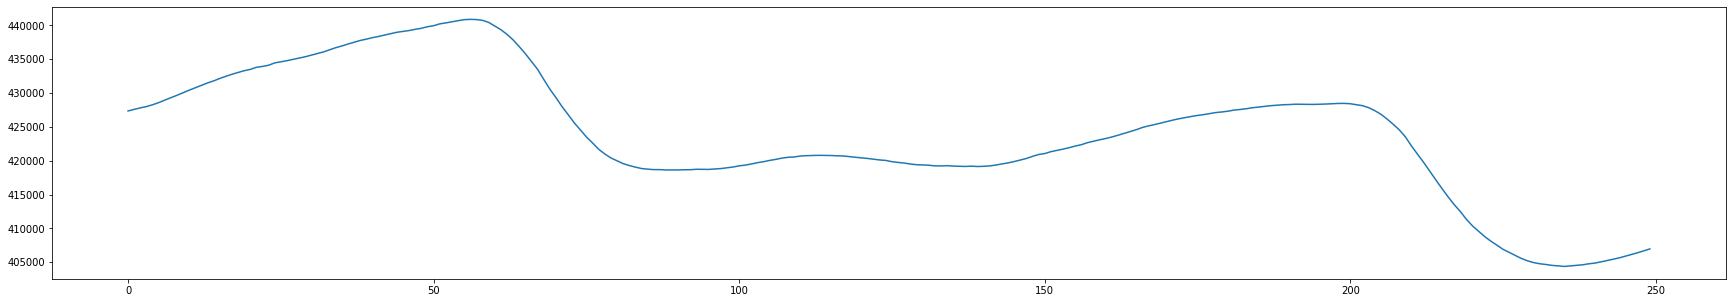

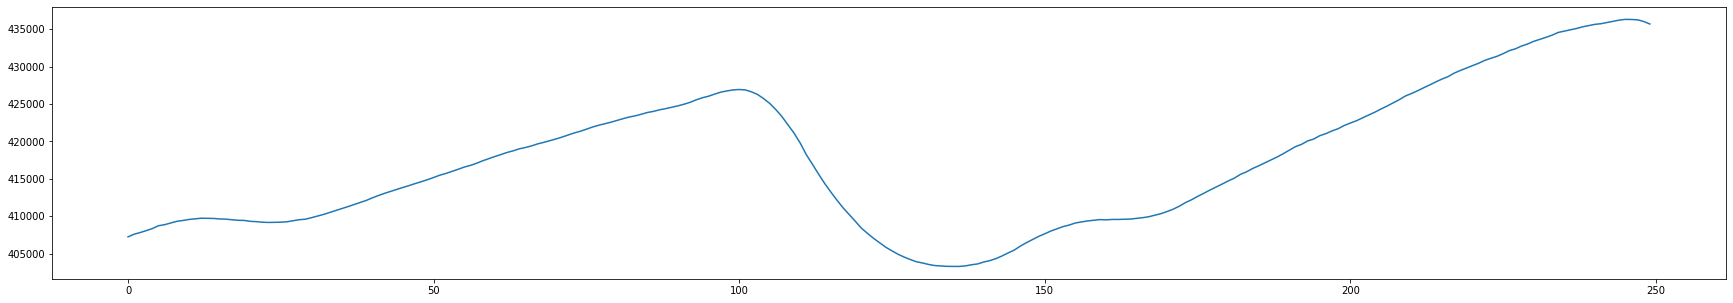

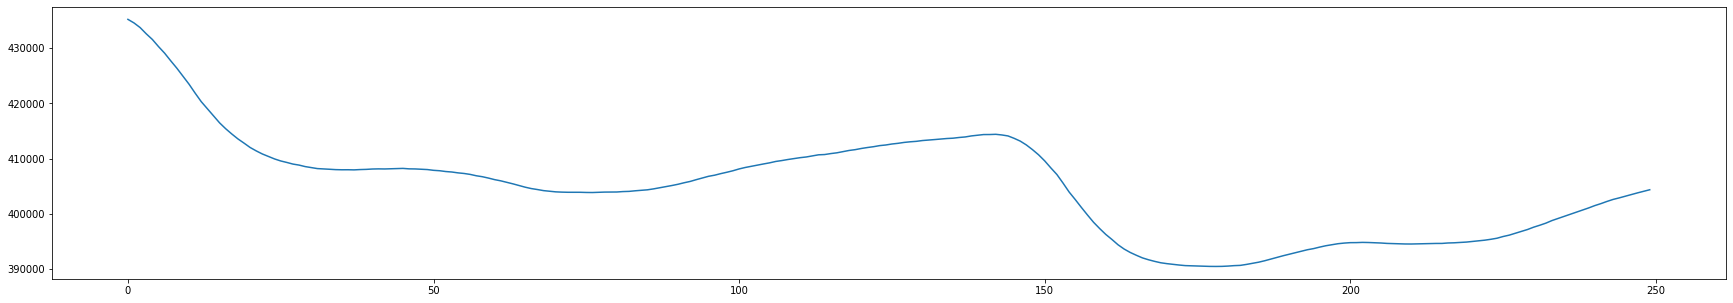

In [51]:
for i in range(0,10):
    plt.figure(figsize=(30,5))
    plt.plot(ppg_chunks[i])
    plt.show()

In [52]:
# ecg_data = np.array(ecg_chunks).reshape(32, 250)


In [53]:
# plt.plot(ecg_data[1])

In [54]:
import numpy as np
from scipy.signal import butter, lfilter

# Define the Butterworth bandpass filter function
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Assuming you have PPG and ECG chunks
# Replace these with your actual chunks


# Define filter parameters
lowcut = 0.9  # Lower cutoff frequency in Hz
highcut = 10.0  # Upper cutoff frequency in Hz
fs = 125.0  # Sampling frequency in Hz
order = 2  # Filter order

# Apply the Butterworth bandpass filter to each PPG and ECG chunk
filtered_ppg_chunks = [butter_bandpass_filter(chunk, lowcut, highcut, fs, order) for chunk in ppg_chunks]
filtered_ecg_chunks = [butter_bandpass_filter(chunk, lowcut, highcut, fs, order) for chunk in ecg_chunks]


In [55]:
from sklearn.preprocessing import StandardScaler



# Initialize StandardScaler
scaler_ppg = StandardScaler()
scaler_ecg = StandardScaler()

# Reshape the chunks to 2D arrays (n_samples, n_features)
reshaped_ppg_chunks = np.array([chunk.flatten() for chunk in filtered_ppg_chunks])
reshaped_ecg_chunks = np.array([chunk.flatten() for chunk in filtered_ecg_chunks])

# Fit and transform the PPG data
scaled_ppg_chunks = scaler_ppg.fit_transform(reshaped_ppg_chunks)

# Fit and transform the ECG data
scaled_ecg_chunks = scaler_ecg.fit_transform(reshaped_ecg_chunks)

# Reshape the scaled data back to 3D arrays
scaled_ppg_chunks = [scaled_ppg_chunks[i].reshape(filtered_ppg_chunks[i].shape) for i in range(len(filtered_ppg_chunks))]
scaled_ecg_chunks = [scaled_ecg_chunks[i].reshape(filtered_ecg_chunks[i].shape) for i in range(len(filtered_ecg_chunks))]


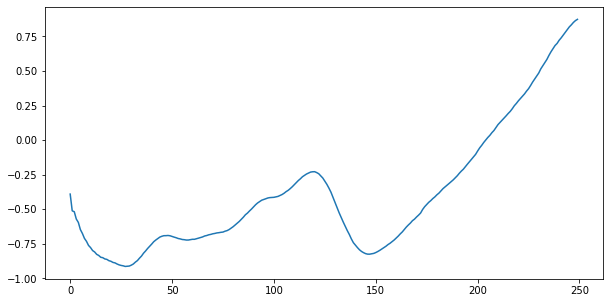

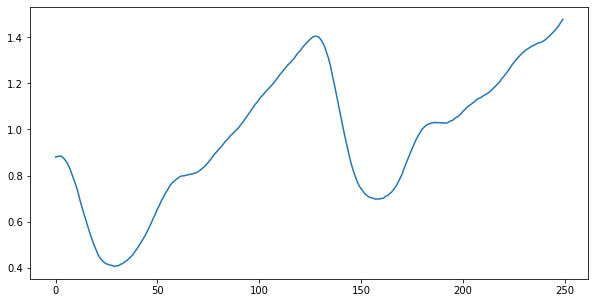

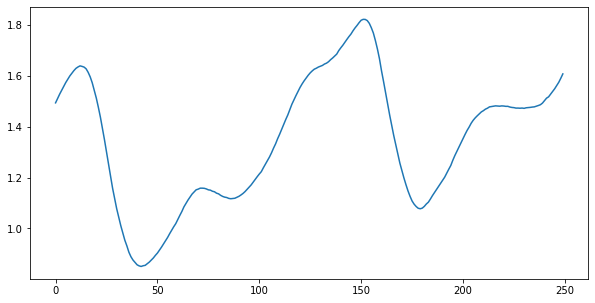

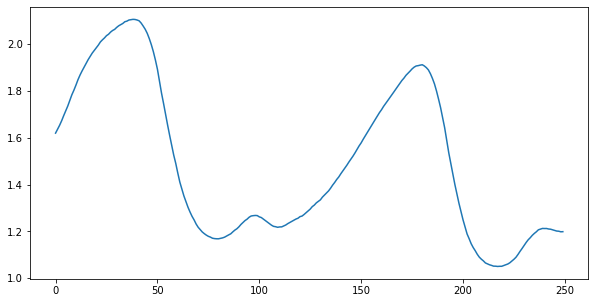

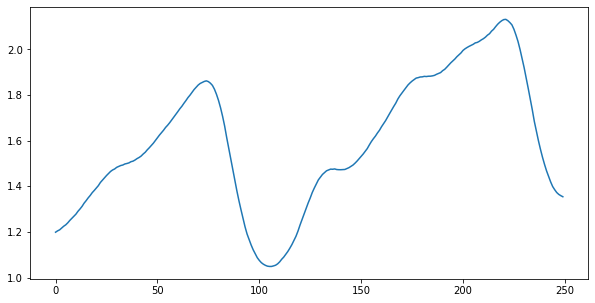

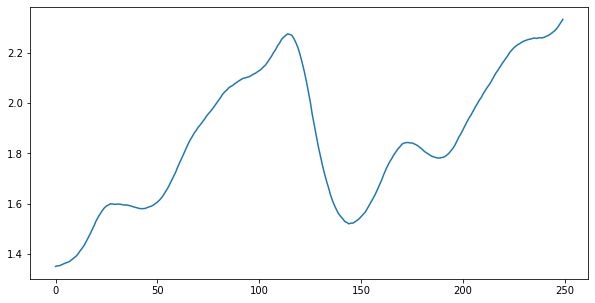

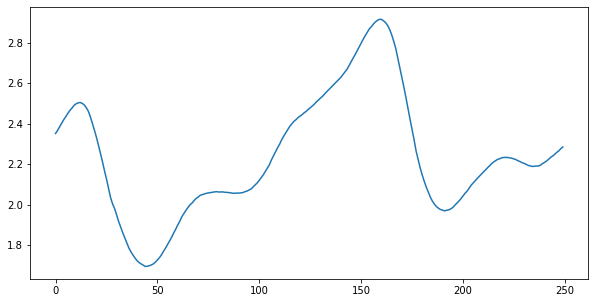

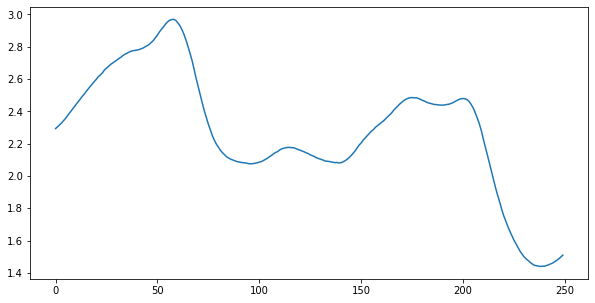

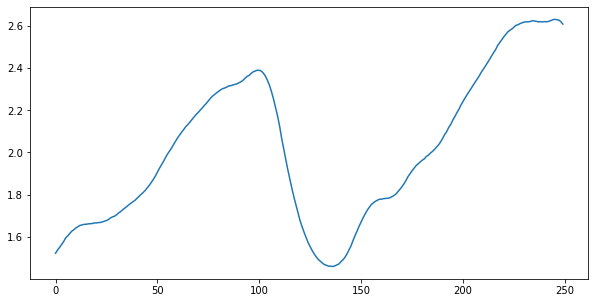

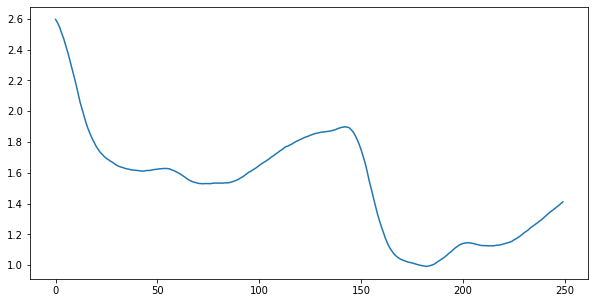

In [56]:
for i in range(0,10):
    plt.figure(figsize=(10,5))
    plt.plot(scaled_ppg_chunks[i])
    plt.show()

In [57]:
data_total = np.concatenate((scaled_ecg_chunks,scaled_ppg_chunks),axis=1)
data_total.shape

(52, 500, 1)

In [69]:
from keras import models    
model = models.load_model('/home/user/Reconstructed ABP waveform/Reviever01_100_20_64.h5')

In [70]:
pre1, yhat1, yhat2  = model.predict(data_total)

2/2 [==============================] - 0s 21ms/step


In [71]:
SBP =[]
DBP = []

for i in range(0,52):

    max_value = max(pre1[i])
    min_value = min(pre1[i])
    
    DBP.append(min_value)
    SBP.append(max_value)

In [72]:
yhat1 = DBP
yhat2 = SBP

In [73]:
yhat1

[70.08069,
 75.70629,
 77.73521,
 82.828514,
 68.6212,
 84.58461,
 64.95068,
 83.492676,
 81.49934,
 73.03184,
 80.203,
 75.14781,
 79.68802,
 72.140976,
 67.34698,
 66.37088,
 71.23625,
 61.535862,
 60.553223,
 76.59116,
 76.73769,
 61.712654,
 64.309296,
 67.92056,
 67.7111,
 75.63534,
 70.858025,
 76.82544,
 58.630287,
 72.64622,
 73.23485,
 64.14331,
 55.273125,
 78.44287,
 66.81784,
 70.92615,
 59.32708,
 82.09501,
 91.21352,
 80.804955,
 78.91134,
 59.698677,
 71.83433,
 79.6733,
 71.88901,
 79.36824,
 72.40877,
 80.58463,
 69.796295,
 75.04581,
 76.51871,
 60.035652]

In [74]:
yhat2

[112.670334,
 112.7252,
 110.03412,
 125.93369,
 123.499,
 121.28304,
 104.26507,
 116.99376,
 131.25626,
 106.2785,
 108.42584,
 120.4574,
 122.915215,
 103.913704,
 90.527954,
 110.604904,
 118.17582,
 111.742546,
 103.70514,
 129.74777,
 110.928604,
 106.27589,
 111.157455,
 116.029366,
 114.40509,
 115.32374,
 111.42659,
 117.908295,
 95.36988,
 136.91669,
 110.52269,
 97.46688,
 101.57472,
 136.83263,
 110.41059,
 108.614105,
 100.3658,
 131.48303,
 123.99144,
 120.43199,
 120.93259,
 101.4501,
 109.45347,
 107.5707,
 103.41432,
 106.91778,
 123.07824,
 118.81995,
 107.07199,
 105.323494,
 113.59417,
 107.68304]

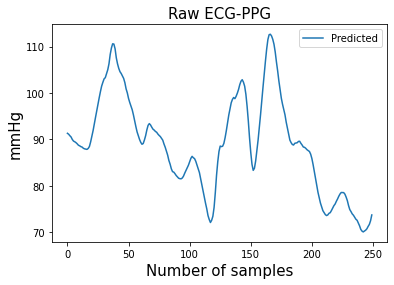

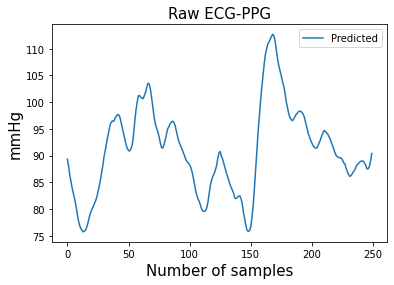

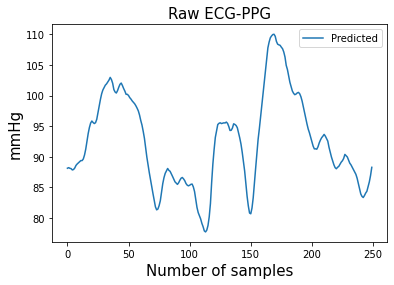

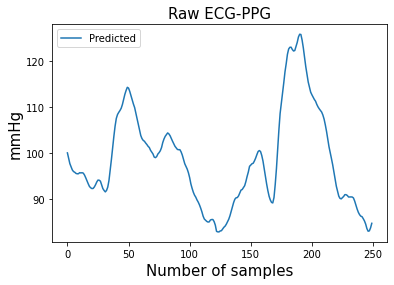

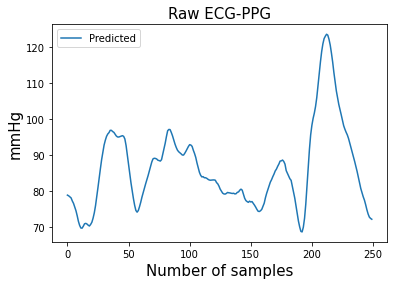

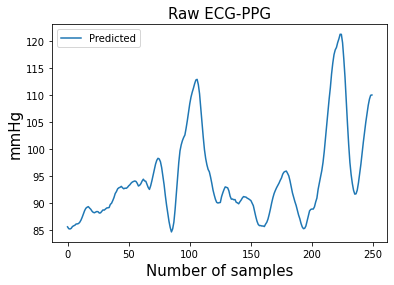

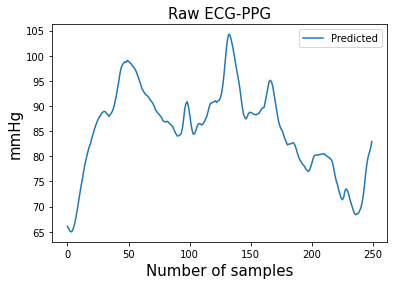

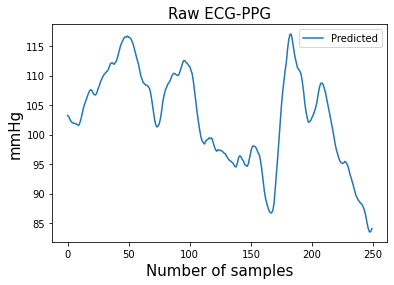

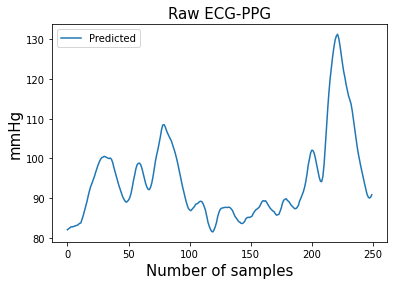

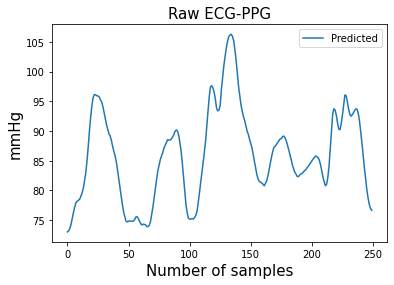

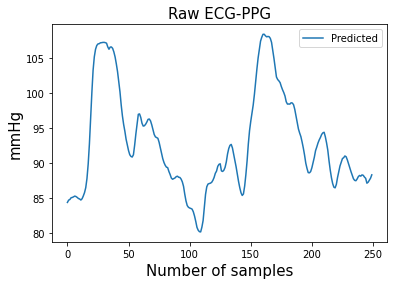

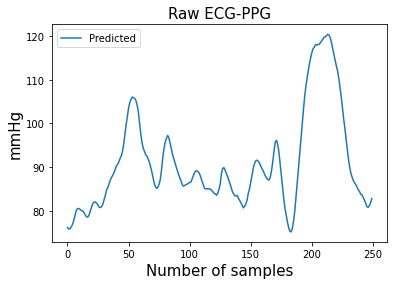

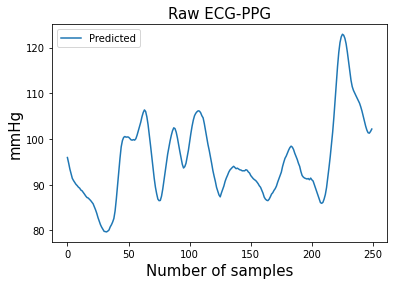

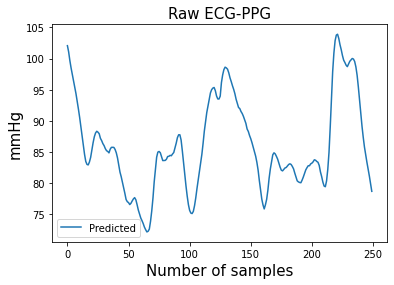

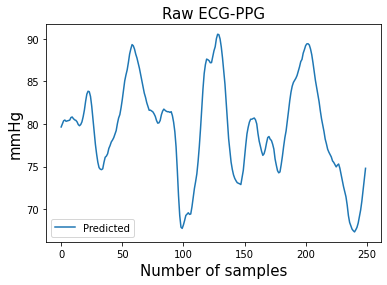

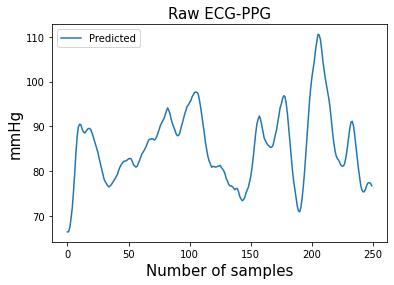

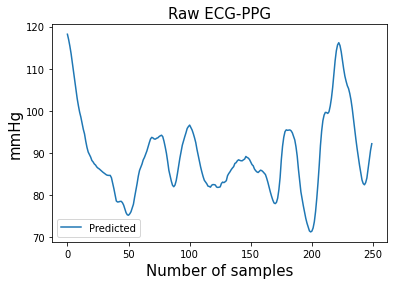

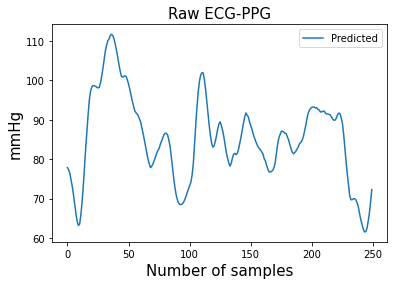

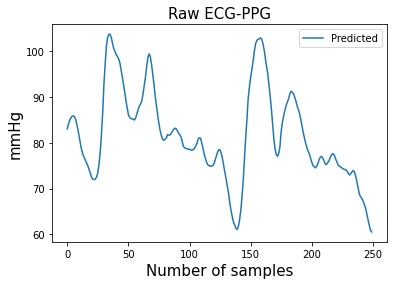

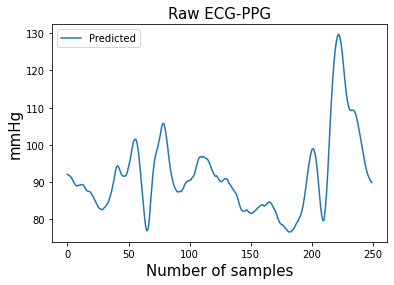

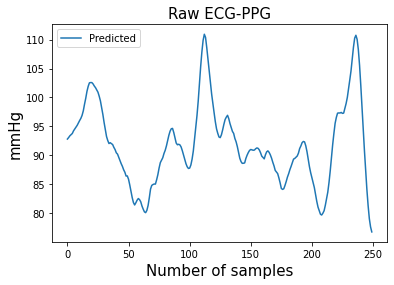

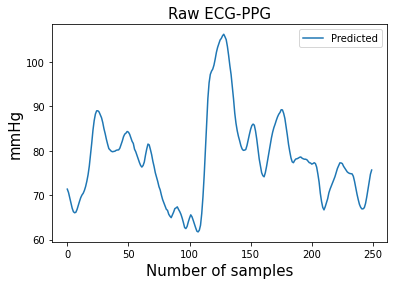

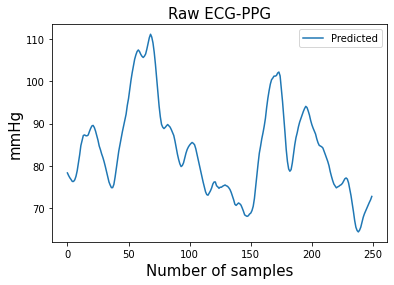

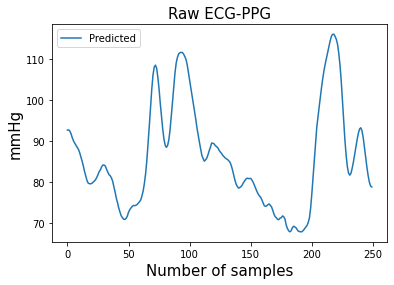

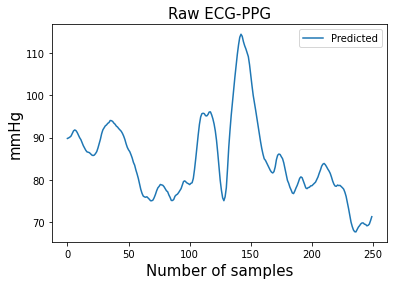

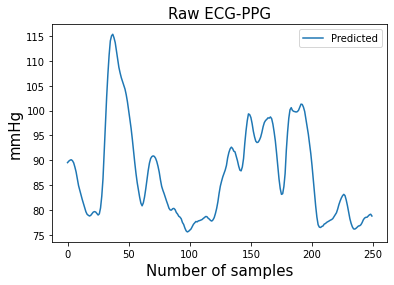

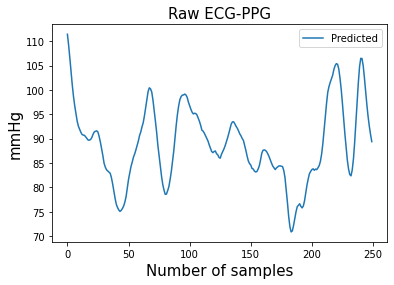

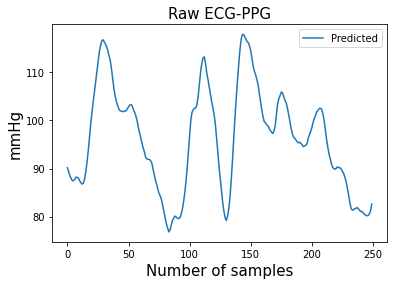

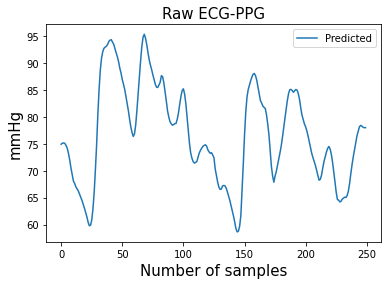

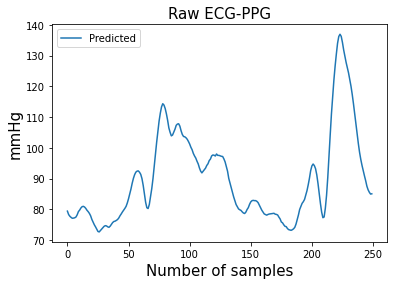

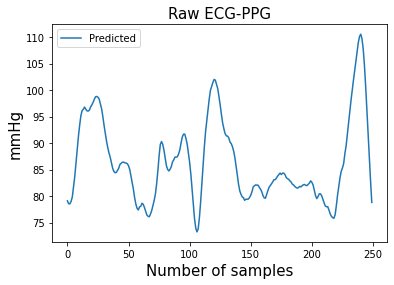

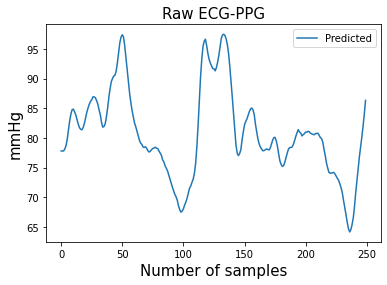

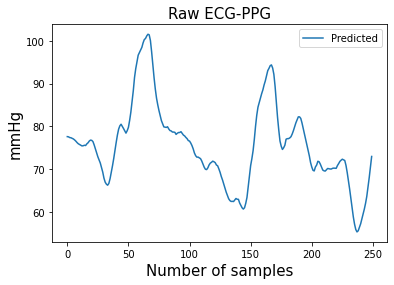

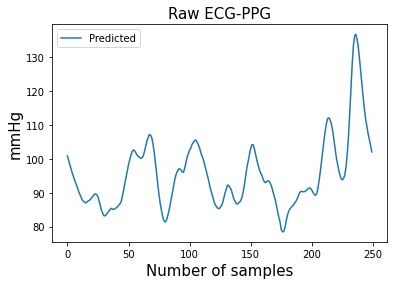

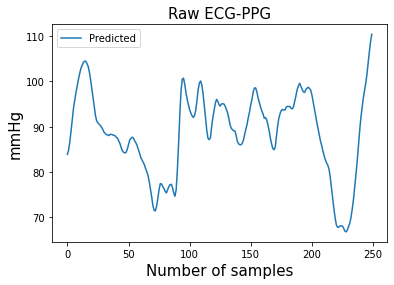

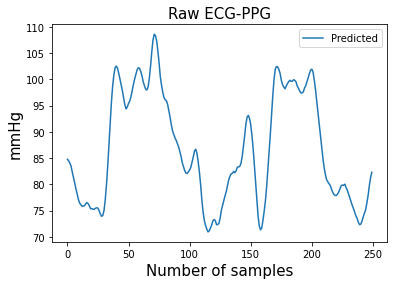

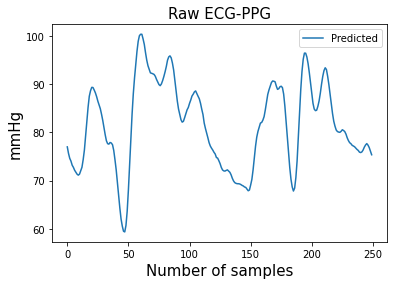

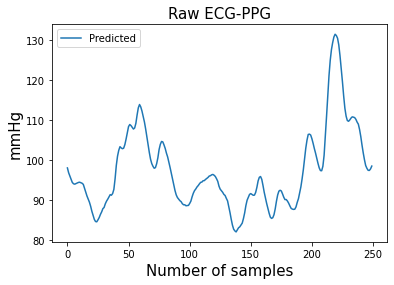

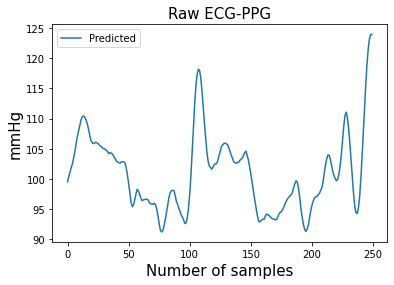

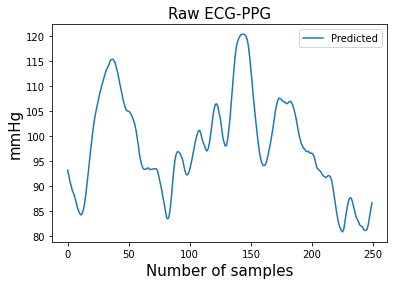

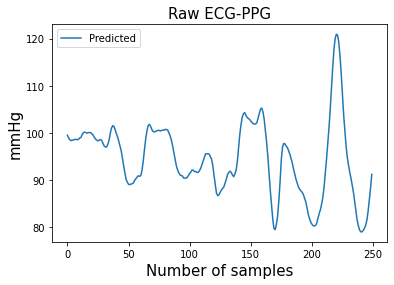

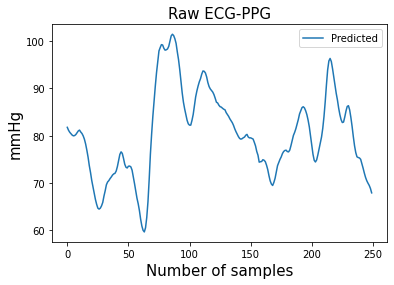

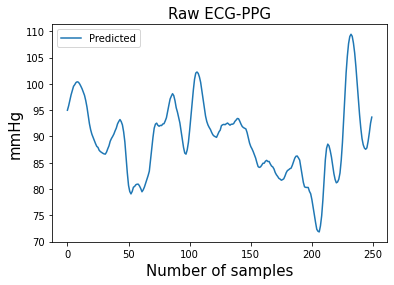

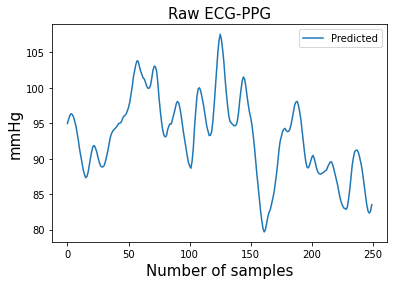

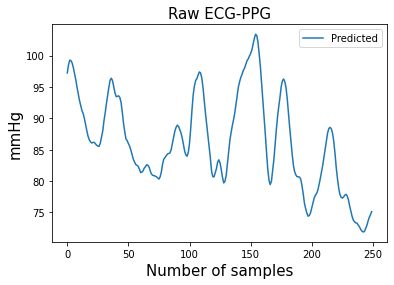

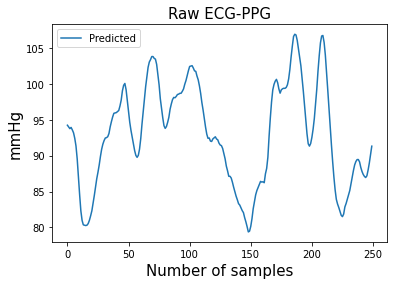

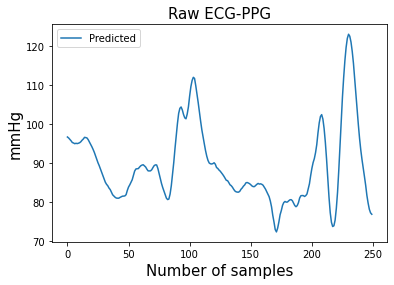

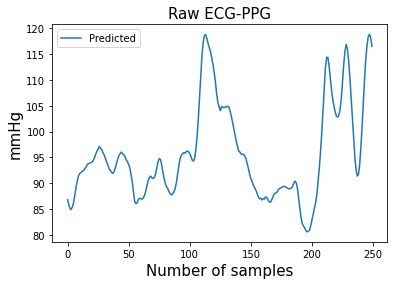

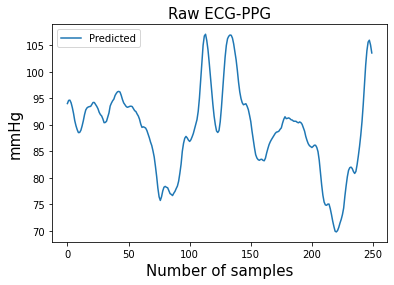

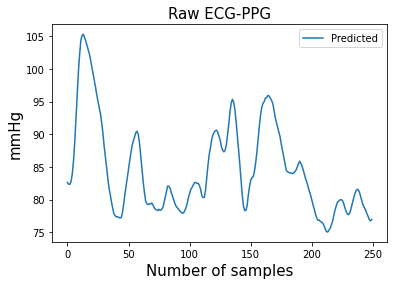

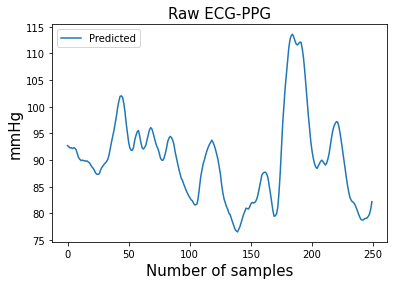

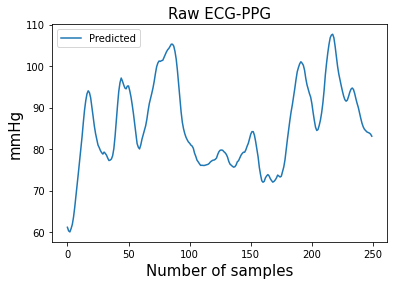

In [75]:
for i in range(0,len(pre1)):
    plt.title('Raw ECG-PPG',fontsize=15)
    # plt.plot(pre1[3],'r',label='True')
    plt.plot(pre1[i], label='Predicted')
    plt.legend()
    plt.xlabel('Number of samples',fontsize=15)
    plt.ylabel('mmHg',fontsize=15)
    plt.show()
    

In [76]:

y_valid = np.random.randint(78,82,(52,1))

z_valid = np.random.randint(135,145,(52,1))

In [77]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
print('R²: ', r2_score(y_valid, yhat1))
print('MAE: ', mean_absolute_error(y_valid, yhat1))
print('RMSE: ', mean_squared_error(y_valid, yhat1, squared=False))


R²:  -87.78523115107521
MAE:  8.55115795135498
RMSE:  10.84046397211879


In [79]:
#DBP
print('R²: ', r2_score(z_valid, yhat2))
print('MAE: ', mean_absolute_error(z_valid, yhat2))
print('RMSE: ', mean_squared_error(z_valid, yhat2, squared=False))


R²:  -106.85471724965838
MAE:  26.84806588979868
RMSE:  28.8645411519702


In [80]:
import seaborn as sns
sns.set()

In [81]:
BPclass = np.zeros(4)
def classify_BP( prediction):

    if (prediction < 5):
        BPclass[0] += 1
    elif (prediction < 10):
        BPclass[1] += 1
    elif (prediction < 15):
        BPclass[2] += 1
    else:
        BPclass[3] += 1

def compute(yTest,yPred):
    # Split dataset into training set and test set in case use the same data for trainning and test
    import math
    Test = []
    Pred = []
    
    band = []
    for i in yTest:
        Test.append(i)
    for i in yPred:
        Pred.append(i)

    # print("list:",Test)
    # print("list:%.2f", Pred)
    erro, std = 0, []
    for i in range(0, yPred.shape[0]):
        # print("yPred: %.3f"%(Pred[i]), "| yTest: %.3f" %(Test[i])," | Erro: %.3f" %(np.abs(Pred[i] - Test[i])))
        # time.sleep(1)
        erro += abs(Pred[i] - Test[i])
        std.append(abs(Pred[i] - Test[i]))
        classify_BP(abs(Pred[i] - Test[i]))
        band.append(Pred[i] - Test[i])
        
        
        
        
        
    fig = plt.figure(figsize=(15, 4), dpi=120)
    ax1 = plt.subplot(1, 3, 1)
#     ax2 = ax1.twinx()
    sns.distplot(band, bins=100, kde=False, rug=False, ax=ax1)
#     sns.distplot(band, bins=100, kde=False, rug=False, ax=ax2)
#     ax2.set_yticklabels(['0 \%', '10 \%', '14.67 \%',
#                      '22.01 \%', '29.35 \%', '36.68 \%', '44.02 \%'])
    ax1.set_xlabel('Error (mmHg)', fontsize=14)
    ax1.set_ylabel('Number of Samples', fontsize=14)
#     ax2.set_ylabel('Percentage of Samples', fontsize=14)
    plt.title('Error in DBP Prediction', fontsize=18)
    plt.xlim(xmax=30.0, xmin=-30.0)
    #plt.xticks(np.arange(0, 60+1, 5))
    plt.tight_layout()


    print("Number of test: %d" % (sum(BPclass)))
    print("Mean Error: %.3f" % (erro / yPred.shape[0]))
    print("Standar Deviation NP: %.3f" % (np.std(std)))
    print("Classe 5mmHg: %d " % (BPclass[0]), "-> %.2f" % (BPclass[0] / (sum(BPclass)) * 100), "%")
    print("Classe 10mmHg: %d " % (BPclass[1]), "-> %.2f" % (BPclass[1] / (sum(BPclass)) * 100), "%",
          " %.2f" % ((BPclass[0] + BPclass[1]) / (sum(BPclass)) * 100), "%")
    print("Classe 15mmHg: %d " % (BPclass[2]), "-> %.2f" % (BPclass[2] / (sum(BPclass)) * 100), "%",
          " %.2f" % ((BPclass[0] + BPclass[1] + BPclass[2]) / (sum(BPclass)) * 100), "%")
    print("Classe >15mmHg: %d " % (BPclass[3]), "-> %.2f" % (BPclass[3] / (sum(BPclass)) * 100), "%")
    # print(" ------- END OF ANALYSIS ------")


In [263]:
def compute1(yTest,yPred):
    # Split dataset into training set and test set in case use the same data for trainning and test
    import math
    Test = []
    Pred = []
    
    band = []
    for i in yTest:
        Test.append(i)
    for i in yPred:
        Pred.append(i)

    # print("list:",Test)
    # print("list:%.2f", Pred)
    erro, std = 0, []
    for i in range(0, yPred.shape[0]):
        # print("yPred: %.3f"%(Pred[i]), "| yTest: %.3f" %(Test[i])," | Erro: %.3f" %(np.abs(Pred[i] - Test[i])))
        # time.sleep(1)
        erro += abs(Pred[i] - Test[i])
        std.append(abs(Pred[i] - Test[i]))
        classify_BP(abs(Pred[i] - Test[i]))
        band.append(Pred[i] - Test[i])
        
        
        
        
        
    fig = plt.figure(figsize=(15, 4), dpi=120)
    ax1 = plt.subplot(1, 3, 1)
#     ax2 = ax1.twinx()
    sns.distplot(band, bins=100, kde=False, rug=False, ax=ax1)
#     sns.distplot(band, bins=100, kde=False, rug=False, ax=ax2)
#     ax2.set_yticklabels(['0 \%', '10 \%', '14.67 \%',
#                      '22.01 \%', '29.35 \%', '36.68 \%', '44.02 \%'])
    ax1.set_xlabel('Error (mmHg)', fontsize=14)
    ax1.set_ylabel('Number of Samples', fontsize=14)
#     ax2.set_ylabel('Percentage of Samples', fontsize=14)
    plt.title('Error in DBP Prediction', fontsize=18)
    plt.xlim(xmax=30.0, xmin=-30.0)
    #plt.xticks(np.arange(0, 60+1, 5))
    plt.tight_layout()


    print("Number of test: %d" % (sum(BPclass)))
    print("Mean Error: %.3f" % (erro / yPred.shape[0]))
    print("Standar Deviation NP: %.3f" % (np.std(std)))
    print("Classe 5mmHg: %d " % (BPclass[0]), "-> %.2f" % (BPclass[0] / (sum(BPclass)) * 100), "%")
    print("Classe 10mmHg: %d " % (BPclass[1]), "-> %.2f" % (BPclass[1] / (sum(BPclass)) * 100), "%",
          " %.2f" % ((BPclass[0] + BPclass[1]) / (sum(BPclass)) * 100), "%")
    print("Classe 15mmHg: %d " % (BPclass[2]), "-> %.2f" % (BPclass[2] / (sum(BPclass)) * 100), "%",
          " %.2f" % ((BPclass[0] + BPclass[1] + BPclass[2]) / (sum(BPclass)) * 100), "%")
    print("Classe >15mmHg: %d " % (BPclass[3]), "-> %.2f" % (BPclass[3] / (sum(BPclass)) * 100), "%")
    # print(" ------- END OF ANALYSIS ------")


/home/user/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/tmp/ipykernel_42384/2706596311.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Mean Error: %.3f" % (erro / yPred.shape[0]))


Number of test: 52
Mean Error: 8.138
Standar Deviation NP: 6.235
Classe 5mmHg: 20  -> 38.46 %
Classe 10mmHg: 15  -> 28.85 %  67.31 %
Classe 15mmHg: 10  -> 19.23 %  86.54 %
Classe >15mmHg: 7  -> 13.46 %


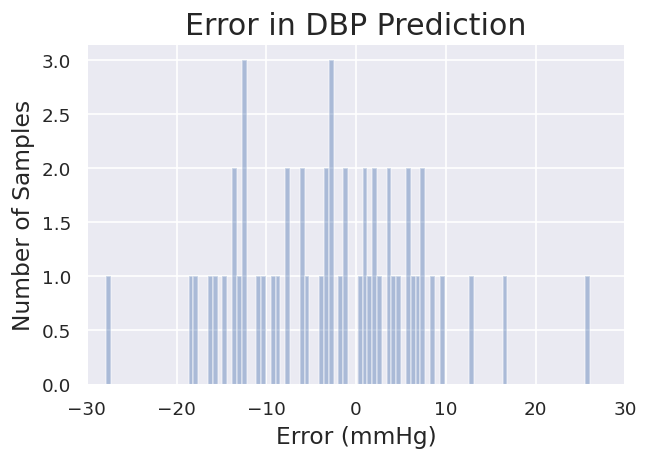

In [264]:
compute(z_valid, yhat2)

Number of test: 104
Mean Error: 14.779
Standar Deviation NP: 4.429
Classe 5mmHg: 21  -> 20.19 %
Classe 10mmHg: 21  -> 20.19 %  40.38 %
Classe 15mmHg: 29  -> 27.88 %  68.27 %
Classe >15mmHg: 33  -> 31.73 %


/tmp/ipykernel_42384/3475154761.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Mean Error: %.3f" % (erro / yPred.shape[0]))


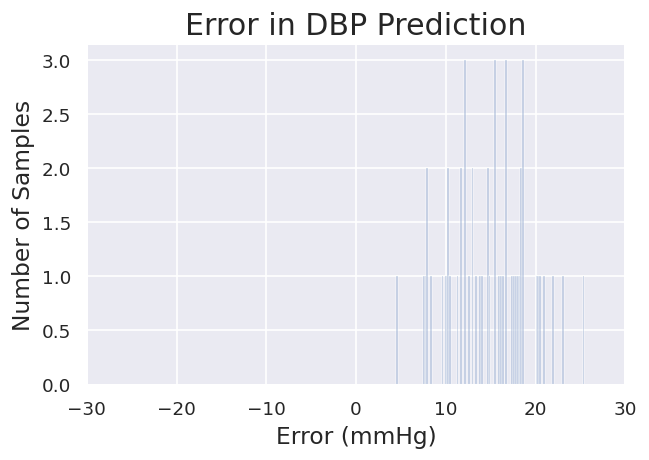

In [265]:
 compute1(yhat1, y_valid)

In [266]:
y_valid  = pd.DataFrame(y_valid)
z_valid  = pd.DataFrame(z_valid)

In [267]:
def bland_altman_plot_SBP(data1, data2):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=1)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    print('md: ', md)
    print('sd: ', sd)
    
    with plt.style.context(('ggplot')):
        
        plt.rcParams['font.serif'] = ['Times New Roman']
        plt.rcParams.update({'font.size':800})
        

        plt.scatter(mean, diff,  c='k', edgecolors='lightgrey')
        plt.axhline(md, color='gray', linestyle='--', label=f'Mean Diff')
        plt.text(160, md , f'Mean Diff : { "%.4f" % md}', fontsize=15)

        plt.axhline(md + 1.96*sd, color='r', linestyle='--',label='+ 1.96*SD')
        plt.text(160, md + 1.96*sd, f'+ 1.96*SD : {"%.4f" % (md + 1.96*sd)}', fontsize=15)
        plt.ylim(-30,30)
        plt.xlim(60, 200)
#         plt.title(' Diastolic Blood Pressure', fontsize=17)
        plt.title(' Systolic Blood Pressure', fontsize=17)
        plt.xlabel('Average of Target and Estimate(mmHg)', fontsize=15)
        plt.ylabel('Error(mmHg)', fontsize=15)
        plt.axhline(md - 1.96*sd, color='r', linestyle='--',label='- 1.96*SD')
        plt.text(160, md - 1.96*sd, f'- 1.96*SD : {"%.4f" % (md - 1.96*sd)}', fontsize=15)

        plt.show()

In [268]:
def bland_altman_plot_DBP(data1, data2):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
  
    print('md: ', md)
    print('sd: ', sd)
    
    
    with plt.style.context(('ggplot')):

        plt.scatter(mean.ravel(), diff.ravel(),  c='k', edgecolors='lightgrey')
        plt.axhline(md, color='gray', linestyle='--', label=f'Mean Diff')
        plt.text(100, md , f'Mean Diff : { "%.4f" % md}', fontsize=15)

        plt.axhline(md + 1.96*sd, color='r', linestyle='--',label='+ 1.96*SD')
        plt.text(100, md + 1.96*sd, f'+ 1.96*SD : {"%.4f" % (md + 1.96*sd)}', fontsize=15)
        plt.ylim(-15,15)
        plt.xlim(50, 110)
        plt.title(' Diastolic Blood Pressure', fontsize=17)
    #     plt.title(' Systolic Blood Pressure', fontsize=17)
        plt.xlabel('Average of Target and Estimate(mmHg)', fontsize=15)
        plt.ylabel('Error(mmHg)', fontsize=15)
        plt.axhline(md - 1.96*sd, color='r', linestyle='--',label='- 1.96*SD')
        plt.text(100, md - 1.96*sd, f'- 1.96*SD : {"%.4f" % (md - 1.96*sd)}', fontsize=15)

        plt.show()


md:  2.7291220151461086
sd:  [9.88206639]


/tmp/ipykernel_42384/2894907013.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(100, md + 1.96*sd, f'+ 1.96*SD : {"%.4f" % (md + 1.96*sd)}', fontsize=15)
/tmp/ipykernel_42384/2894907013.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(100, md - 1.96*sd, f'- 1.96*SD : {"%.4f" % (md - 1.96*sd)}', fontsize=15)


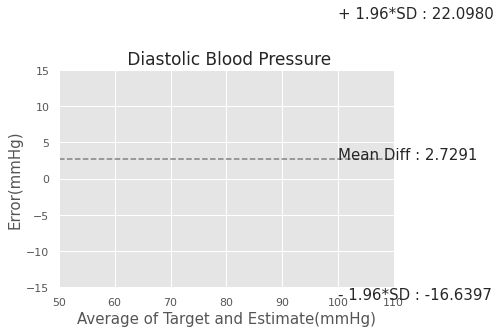

In [269]:
bland_altman_plot_DBP( z_valid, yhat2 )

md:  -14.779423346886269
sd:  [4.42920995]


ValueError: x and y must be the same size

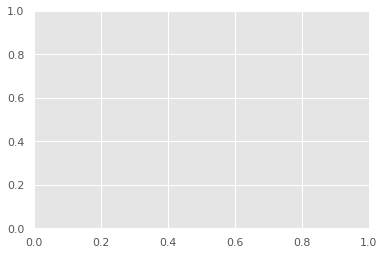

In [270]:
bland_altman_plot_SBP(yhat1, y_valid )

In [271]:
Ypred1 = yhat1.ravel()

Ytrue = z_valid.values.ravel()
Ypred = yhat2.ravel()# loading prediction
#     Ytrue1 = y_valid.values
#     Ytrue1 = y_valid.values
#     Ypred1 = yhat1
Ytrue1 = y_valid.values.ravel()


In [272]:
from plot import evaluate_BP_Classification
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

# evaluate_BP_Classification(z_valid, yhat2, yhat1, y_valid)

In [273]:
Ypred1 = yhat1.ravel()

Ypred1

array([65.02106 , 70.5412  , 68.75106 , 73.18265 , 61.519993, 67.69015 ,
       60.356358, 66.89424 , 66.388466, 64.67982 , 70.13593 , 68.96443 ,
       69.41216 , 63.659454, 61.28565 , 62.21099 , 63.048256, 62.328533,
       59.57629 , 66.03064 , 64.13144 , 58.888283, 60.636307, 59.377716,
       61.432743, 64.94548 , 65.84058 , 70.98012 , 54.93867 , 66.30287 ,
       59.36441 , 60.15013 , 53.55098 , 69.18397 , 65.24951 , 64.42388 ,
       59.928974, 73.51046 , 71.699036, 73.01799 , 68.8078  , 57.08356 ,
       64.435814, 72.507065, 64.92793 , 66.2914  , 60.751995, 66.76112 ,
       61.150578, 62.533497, 65.5059  , 59.482445], dtype=float32)

DBPS Classification Accuracy
              precision    recall  f1-score   support

Hypertension    1.00000   1.00000   1.00000        52

    accuracy                        1.00000        52
   macro avg    1.00000   1.00000   1.00000        52
weighted avg    1.00000   1.00000   1.00000        52

SBPS Classification Accuracy
              precision    recall  f1-score   support

Normotension    1.00000   1.00000   1.00000        52

    accuracy                        1.00000        52
   macro avg    1.00000   1.00000   1.00000        52
weighted avg    1.00000   1.00000   1.00000        52



ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (3).

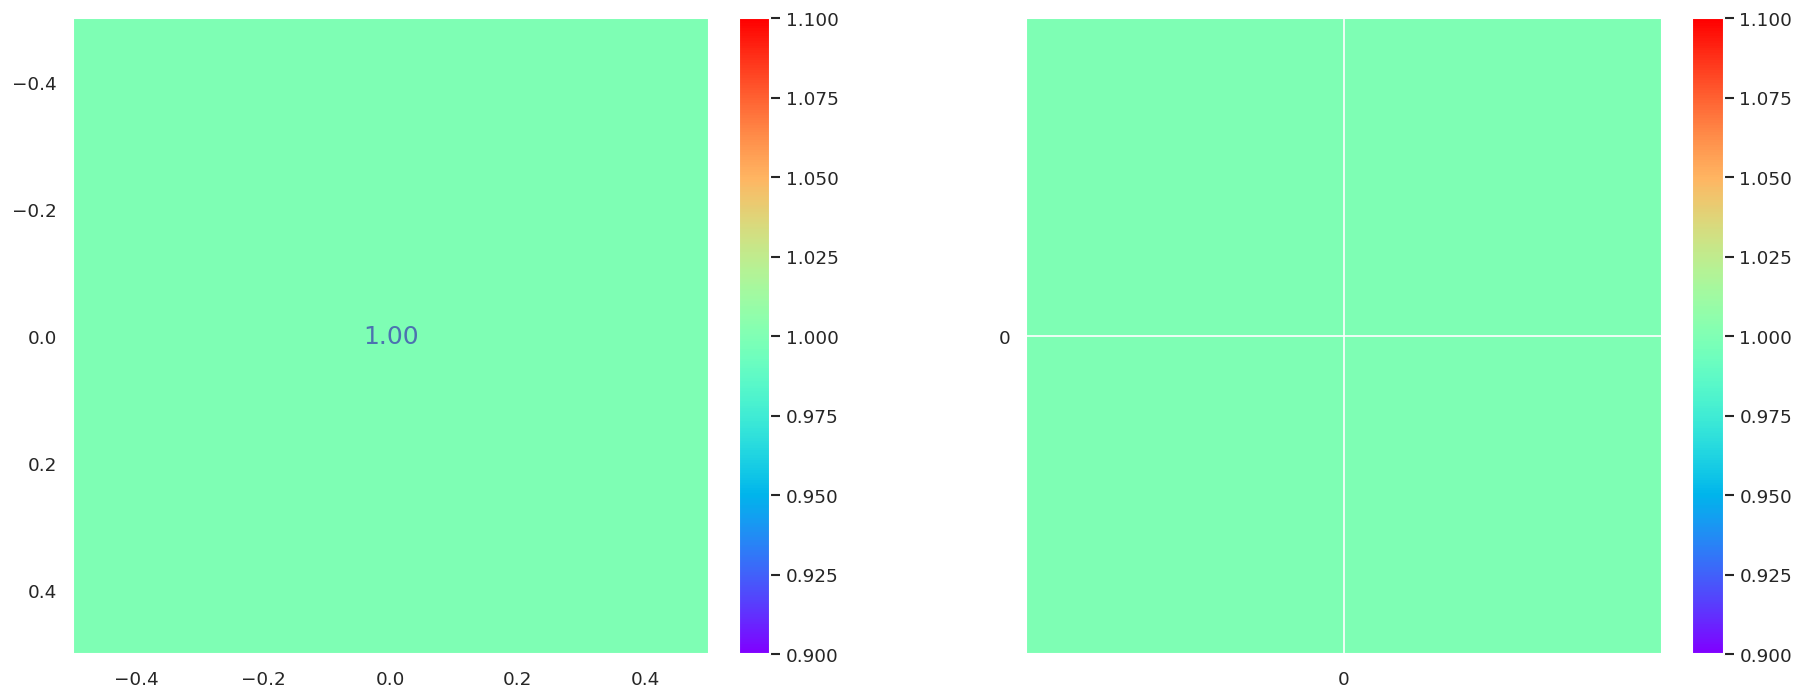

In [274]:
Ypred1 = yhat1.ravel()

Ytrue = z_valid.values.ravel()
Ypred = yhat2.ravel()# loading prediction
#     Ytrue1 = y_valid.values
#     Ytrue1 = y_valid.values
#     Ypred1 = yhat1
Ytrue1 = y_valid.values.ravel()

### DBPS ####

cls_gt = []
cls_pred = []

for i in (range(len(Ytrue))):
    dbp_gt = Ytrue[i].ravel()
    dbp_pred = Ypred[i].ravel()

    # 		dbp_gt = max_abp*min(y_t)+min_abp
    # 		dbp_pred = max_abp*min(y_p)+min_abp

    if (dbp_gt <= 80):
        cls_gt.append('Normotension')
    elif ((dbp_gt > 80) and (dbp_gt <= 90)).all():
        cls_gt.append('Pre-hypertension')
    elif (dbp_gt > 90).all():
        cls_gt.append('Hypertension')
    else:
        print('bump')  # this will never happen, check for error

    if (dbp_pred <= 80):
        cls_pred.append('Normotension')
    elif ((dbp_pred > 80) and (dbp_pred <= 90)):
        cls_pred.append('Pre-hypertension')
    elif (dbp_pred > 90):
        cls_pred.append('Hypertension')
    else:
        print('bump')  # this will never happen, check for error

print('DBPS Classification Accuracy')
print(classification_report(cls_gt, cls_pred, digits=5))
# print('-'*25)
# print(accuracy_score(cls_gt,cls_pred))

cm = confusion_matrix(cls_gt, cls_pred)
classes = ['Hypertension', 'Normotension', 'Prehypertension']
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig = plt.figure(figsize=(16, 6), dpi=120)
ax = plt.subplot(1, 2, 1)
im = ax.imshow(cm, interpolation='nearest', cmap="rainbow")  # draw confusion matrix

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.25)

ax.figure.colorbar(im, cax=cax)
# ax.set(xticks=np.arange(cm.shape[1]),
#        yticks=np.arange(cm.shape[0]),
#        xticklabels=classes, yticklabels=classes)

# ax.set_title('Blood Pressure Classification Accuracy Using DBP', fontsize=18)
# ax.set_ylabel('True label', fontsize=16)
# ax.set_xlabel('Predicted label', fontsize=16)

# plt.setp(ax.get_xticklabels(), rotation=45, fontsize=15, ha="right",
#          rotation_mode="anchor")

# plt.setp(ax.get_yticklabels(), fontsize=15)

fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center", fontsize=15,
                color="b" if cm[i, j] > thresh else "black")

ax.grid(False)

fig.tight_layout()

### SBPS ####

cls_gt = []
cls_pred = []

for i in (range(len(Ytrue))):
    sbp_gt = Ytrue1[i].ravel()
    sbp_pred = Ypred1[i].ravel()

    if (sbp_gt <= 120):
        cls_gt.append('Normotension')
    elif ((sbp_gt > 120) and (sbp_gt <= 140)):
        cls_gt.append('Prehypertension')
    elif (sbp_gt > 140):
        cls_gt.append('Hypertension')
    else:
        print('bump')  # this will never happen, check for error

    if (sbp_pred <= 120):
        cls_pred.append('Normotension')
    elif ((sbp_pred > 120) and (sbp_pred <= 140)):
        cls_pred.append('Prehypertension')
    elif (sbp_pred > 140):
        cls_pred.append('Hypertension')
    else:
        print('bump')  # this will never happen, check for error

print('SBPS Classification Accuracy')
print(classification_report(cls_gt, cls_pred, digits=5))
# print('-'*25)
# print(accuracy_score(cls_gt,cls_pred))

cm = confusion_matrix(cls_gt, cls_pred)
classes = ['Hypertension', 'Normotension', 'Prehypertension']
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.subplot(1, 2, 2)
im = ax.imshow(cm, interpolation='nearest', cmap="rainbow")  # draw confusion matrix

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.25)

ax.figure.colorbar(im, cax=cax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes)

ax.set_title('Blood Pressure Classification Accuracy Using SBP', fontsize=18)
ax.set_ylabel('True label', fontsize=16)
ax.set_xlabel('Predicted label', fontsize=16)

plt.setp(ax.get_xticklabels(), rotation=45, fontsize=15, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_yticklabels(), fontsize=15)

fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center", fontsize=15,
                color="b" if cm[i, j] > thresh else "black")

ax.grid(False)

fig.tight_layout()

plt.show()
